In [585]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [586]:
import os
os.listdir('./MyDrive/ML offline')

['WA_Fn-UseC_-HR-Employee-Attrition.csv']

## **Task A: Understanding the dataset**

In [587]:
import pandas as pd
data = pd.read_csv('./MyDrive/ML offline/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [588]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [589]:
df = pd.DataFrame(data)
rows, columns = df.shape
print(f"Number of attributes: {columns}")
print(f"Number of records: {rows}")

Number of attributes: 35
Number of records: 1470


In [590]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [591]:
numeric_df = df.select_dtypes(include=[int, float])
numeric_df.shape

(1470, 26)

In [592]:
column_means = numeric_df.mean()
print(f"Column Means:\n-------------------\n{column_means}")

Column Means:
-------------------
Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole     

In [593]:
column_std = numeric_df.std()
print(f"Column Standard Deviation:\n-------------------\n{column_std}")

Column Standard Deviation:
-------------------
Age                            9.135373
DailyRate                    403.509100
DistanceFromHome               8.106864
Education                      1.024165
EmployeeCount                  0.000000
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.102846
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StandardHours                  0.000000
StockOptionLevel               0.852077
TotalWorkingYears              7.780782
TrainingTimesLastYear          1.289271
WorkLifeBalance                0.706476
YearsAtCompany                 6.126525
YearsInCurrentRole             3.

In [594]:
column_max = numeric_df.max()
column_min = numeric_df.min()

print(f"--------------------\nMaximum values:\n--------------------\n{column_max}")
print(f"--------------------\nMinimum values:\n--------------------\n{column_min}")

--------------------
Maximum values:
--------------------
Age                            60
DailyRate                    1499
DistanceFromHome               29
Education                       5
EmployeeCount                   1
EmployeeNumber               2068
EnvironmentSatisfaction         4
HourlyRate                    100
JobInvolvement                  4
JobLevel                        5
JobSatisfaction                 4
MonthlyIncome               19999
MonthlyRate                 26999
NumCompaniesWorked              9
PercentSalaryHike              25
PerformanceRating               4
RelationshipSatisfaction        4
StandardHours                  80
StockOptionLevel                3
TotalWorkingYears              40
TrainingTimesLastYear           6
WorkLifeBalance                 4
YearsAtCompany                 40
YearsInCurrentRole             18
YearsSinceLastPromotion        15
YearsWithCurrManager           17
dtype: int64
--------------------
Minimum values:
--------

In [595]:
missing_values = df.isna().sum()
print(f"Missing values in each column:\n-------------------------\n{missing_values}")

total_missing = df.isna().sum().sum()
print(f"\nTotal number of missing values in the DataFrame: {total_missing}")

Missing values in each column:
-------------------------
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompan

In [596]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows:\n---------------------------\n{duplicate_rows}")

Number of duplicate rows:
---------------------------
0


# **Task B: Data Cleaning**

In [597]:
numeric_columns = df.select_dtypes(include=[float, int])
# print(df[numeric_columns.columns].shape)
df[numeric_columns.columns] = df[numeric_columns.columns].fillna(numeric_columns.mean())
missing_values_after_fill = df[numeric_columns.columns].isna().sum()
print(f"Missing values in each column:\n-------------------------\n{missing_values_after_fill}")

Missing values in each column:
-------------------------
Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [598]:
non_numeric_columns = df.select_dtypes(exclude=[float, int])
non_numeric_columns.drop(columns=['Attrition'], inplace=True) #remove the output feature
for column in non_numeric_columns.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

In [599]:
missing_values_after_fill = df[non_numeric_columns.columns].isna().sum()
print(f"Missing values in each column:\n-------------------------\n{missing_values_after_fill}")

Missing values in each column:
-------------------------
BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
Over18            0
OverTime          0
dtype: int64


In [600]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [601]:
df.drop_duplicates(inplace=True)

In [602]:
df.dropna(subset=['Attrition'], inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Task C: Creation of input output**

In [603]:
# create input and output data
features = df.drop('Attrition', axis=1)
target = df['Attrition']

In [604]:
features.shape
# target.shape

(1470, 34)

# **Task D: Conversion of features into numeric values**

In [605]:
from sklearn.preprocessing import LabelEncoder

# df['Attrition'].nunique()
encoder = LabelEncoder()
target = encoder.fit_transform(target)
target

array([1, 0, 1, ..., 0, 0, 0])

In [606]:
non_numeric_columns = features.select_dtypes(exclude=[float, int])
non_numeric_columns.nunique()

,0
BusinessTravel,3
Department,3
EducationField,6
Gender,2
JobRole,9
MaritalStatus,3
Over18,1
OverTime,2


In [611]:
columns_to_label_encode = non_numeric_columns.columns[non_numeric_columns.nunique() <= 2]
print(columns_to_label_encode)
columns_label_encode = features[columns_to_label_encode]
# features.head()

for column in columns_to_label_encode:
    features[column] = encoder.fit_transform(features[column])

features['Gender'].head()

Index(['Gender', 'Over18', 'OverTime'], dtype='object')


,Gender
0,0
1,1
2,1
3,0
4,1


In [612]:
columns_to_encode = non_numeric_columns.columns[non_numeric_columns.nunique() > 2]
# print(columns_to_encode)
features = pd.get_dummies(features, columns=columns_to_encode)

In [613]:
features.shape

(1470, 53)

In [614]:
features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,False,False,False,False,False,True,False,False,False,True
1,49,279,8,1,1,2,3,1,61,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1373,2,2,1,4,4,1,92,2,...,True,False,False,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,0,56,3,...,False,False,False,False,True,False,False,False,True,False
4,27,591,2,1,1,7,1,1,40,3,...,True,False,False,False,False,False,False,False,True,False


In [615]:
features = features.astype(int)

In [616]:
features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,1,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


In [617]:
features.nunique()

,0
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EmployeeNumber,1470
EnvironmentSatisfaction,4
Gender,2
HourlyRate,71
JobInvolvement,4


In [618]:
# columns_to_drop = features.columns[features.nunique() == 1]
# features.drop(columns=columns_to_drop, inplace=True)
features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,1,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


# **Task E: Scaling the features**

**Minmax scaling**

In [619]:
# numeric_columns.head()
# columns_label_encode.shape
df_scale = pd.concat([numeric_columns, columns_label_encode], axis=1)
df_scale = pd.DataFrame(df_scale)

df_one_hot = features.drop(columns=df_scale.columns)
df_one_hot = pd.DataFrame(df_one_hot)
print(df_one_hot.shape)

(1470, 24)


In [623]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(df_scale)

features_minmax = pd.DataFrame(features_minmax,columns=df_scale.columns)
features_minmax.shape

(1470, 29)

In [624]:
features_minmax = pd.concat([features_minmax, df_one_hot], axis=1)
# features_minmax.shape
features_minmax.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,...,0,0,0,0,0,1,0,0,0,1
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,...,0,0,0,0,1,0,0,0,1,0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,...,1,0,0,0,0,0,0,0,0,1
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,...,0,0,0,0,1,0,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,...,1,0,0,0,0,0,0,0,1,0


**Standard scaling**

In [625]:
# scale the input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_std = scaler.fit_transform(df_scale)

features_std = pd.DataFrame(features_std,columns=df_scale.columns)
features_std.shape

(1470, 29)

In [626]:
features_std = pd.concat([features_std, df_one_hot], axis=1)
features_std.shape
# features_std.head()

(1470, 53)

In [627]:
features_minmax.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.914286,0.666667,0.25,...,0,0,0,0,0,1,0,0,0,1
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,0.442857,0.333333,0.25,...,0,0,0,0,1,0,0,0,1,0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,0.885714,0.333333,0.00,...,1,0,0,0,0,0,0,0,0,1
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.371429,0.666667,0.00,...,0,0,0,0,1,0,0,0,1,0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,0.142857,0.666667,0.00,...,1,0,0,0,0,0,0,0,1,0


In [628]:
features_std.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,1.383138,0.379672,-0.057788,...,0,0,0,0,0,1,0,0,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,-0.240677,-1.026167,-0.057788,...,0,0,0,0,1,0,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,1.284725,-1.026167,-0.961486,...,1,0,0,0,0,0,0,0,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-0.486709,0.379672,-0.961486,...,0,0,0,0,1,0,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,-1.274014,0.379672,-0.961486,...,1,0,0,0,0,0,0,0,1,0


# **Task F: Corelation analysis**

In [629]:
features_df_minmax = pd.DataFrame(features_minmax, columns=features.columns)
features_df_minmax.shape

(1470, 53)

In [630]:
features_df_std = pd.DataFrame(features_std, columns=features.columns)
features_df_std.shape

(1470, 53)

In [631]:
target_df = pd.DataFrame(target, columns=['Attrition'])

In [636]:
target_series = target_df['Attrition']
correlation_minmax = features_df_minmax.corrwith(target_series).abs().sort_values(ascending=False)
correlation_minmax

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
OverTime,0.246118
MaritalStatus_Single,0.175419
TotalWorkingYears,0.171063
JobLevel,0.169105
YearsInCurrentRole,0.160545
MonthlyIncome,0.159840
Age,0.159205
JobRole_Sales Representative,0.157234
YearsWithCurrManager,0.156199
StockOptionLevel,0.137145


In [637]:
top_20_minmax = correlation_minmax.index[:20]

In [638]:
df_minmax_top_20 = features_df_minmax[top_20_minmax]

In [639]:
df_minmax_top_20.shape

(1470, 20)

In [640]:
correlations_std = features_df_std.corrwith(target_series).abs().sort_values(ascending=False)
correlations_std

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
OverTime,0.246118
MaritalStatus_Single,0.175419
TotalWorkingYears,0.171063
JobLevel,0.169105
YearsInCurrentRole,0.160545
MonthlyIncome,0.159840
Age,0.159205
JobRole_Sales Representative,0.157234
YearsWithCurrManager,0.156199
StockOptionLevel,0.137145


In [641]:
top_20_std = correlations_std.index[:20]

In [642]:
df_std_top_20 = features_df_std[top_20_minmax]

In [643]:
df_std_top_20.shape

(1470, 20)

**Plotting**

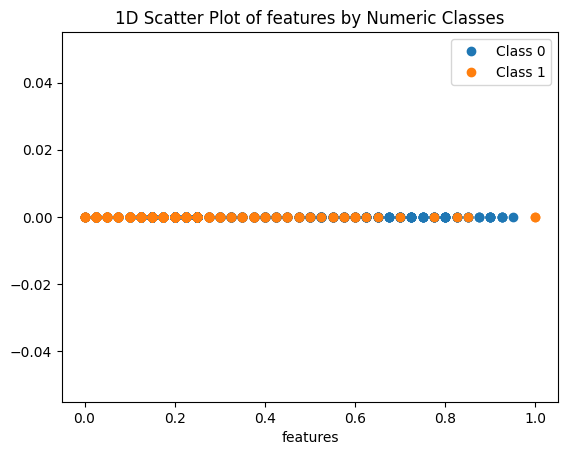

In [649]:
import matplotlib.pyplot as plt
import numpy as np

class_0 = features_df_minmax.loc[target_df["Attrition"] == 0]
class_1 = features_df_minmax.loc[target_df["Attrition"] == 1]

column = df_minmax_top_20.columns[2]
plt.plot(class_0[column], np.zeros_like(class_0[column]), 'o', label='Class 0')
plt.plot(class_1[column], np.zeros_like(class_1[column]), 'o', label='Class 1')

plt.legend()
plt.xlabel('features')
plt.title('1D Scatter Plot of features by Numeric Classes')
plt.show()



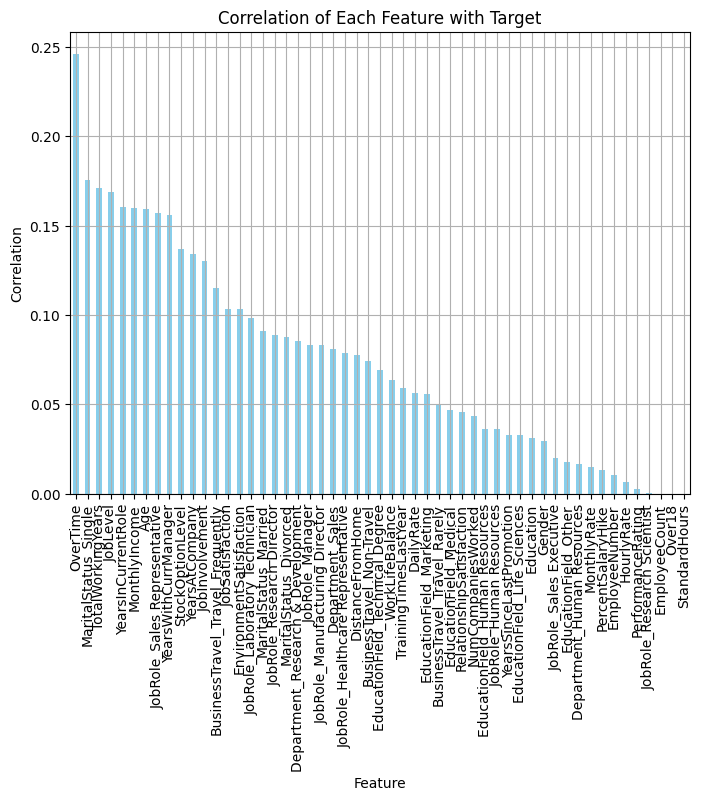

In [650]:
plt.figure(figsize=(8, 6))
correlation_minmax.plot(kind='bar', color='skyblue')
plt.title('Correlation of Each Feature with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

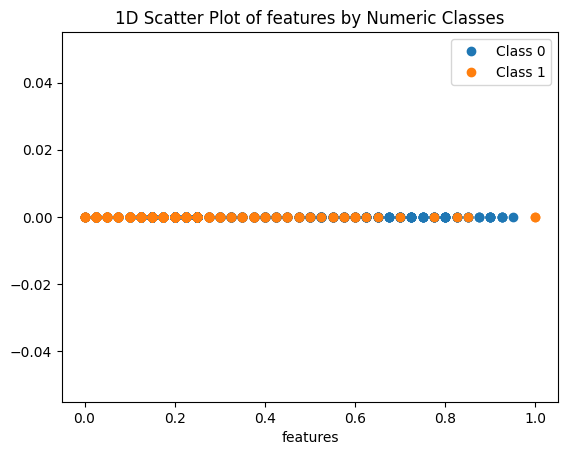

In [651]:
import matplotlib.pyplot as plt
import numpy as np

class_0 = features_df_minmax.loc[target_df["Attrition"] == 0]
class_1 = features_df_minmax.loc[target_df["Attrition"] == 1]

column = df_std_top_20.columns[2]
plt.plot(class_0[column], np.zeros_like(class_0[column]), 'o', label='Class 0')
plt.plot(class_1[column], np.zeros_like(class_1[column]), 'o', label='Class 1')

plt.legend()
plt.xlabel('features')
plt.title('1D Scatter Plot of features by Numeric Classes')
plt.show()

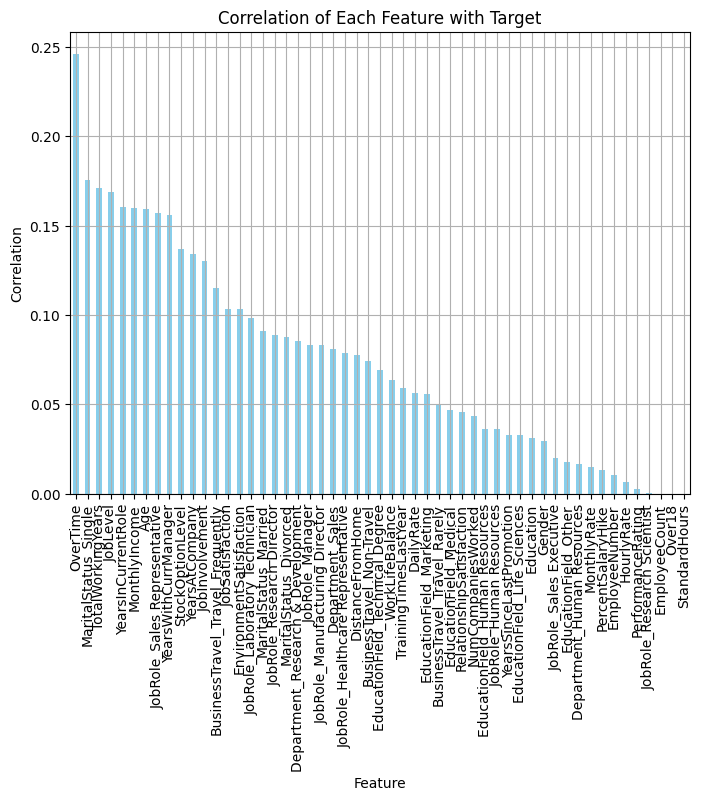

In [653]:
plt.figure(figsize=(8, 6))
correlations_std.plot(kind='bar', color='skyblue')
plt.title('Correlation of Each Feature with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# **Task G: Validating the pipeline (Bonus Task)**

In [658]:
# create a simple classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_df_minmax, target_df, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.891156462585034

In [660]:
# create a simple classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_df_std, target_df, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.891156462585034